In [1]:
#WELCOME TO THE NLP, TEXT MINING AND TEXT PROCESSING TUTORIAL
#IN THIS NOTEBOOK WE GO FROM SIMPLE TO COMPLEX, ESSENTIAL TO OPTIONAL, AS YOU SCROLL DOWN.

In [ ]:
#IMPORTANT-MAKE A NEW PYTHON ENVIRONMENT

In [ ]:
#

In [2]:
#LOADING IN YOUR DATA

In [3]:
#Text data comes in many forms, .txt files, .json files, .pdf files
#Alan's Pandas tutorial would have walked you through some of this

In [4]:
#The 'data' folder contains State Constitution PDF files. Lets explore these

In [46]:
!ls -lah ./data/regex/

total 1.5K
drwxrws--- 2 nak3t bii_sdad_dspg 4.0K Jun 12 23:38 .
drwxrws--- 7 nak3t bii_sdad_dspg 4.0K Jun 12 22:37 ..
-rwxrwx--- 1 nak3t bii_sdad_dspg 2.9K Jun 12 23:38 storytime.txt


In [20]:
import re

txt = "The rain in Spain falls mainly on the plain"
x = re.findall("ai", txt)
print(x) 

['ai', 'ai', 'ai', 'ai']


In [21]:
txt = "The rain in Spain"
x = re.search("\s", txt)

print("The first white-space character is located in position:", x.start()) 

The first white-space character is located in position: 3


In [22]:
#Split is useful to process data from different formats

In [26]:
#Split on every Instance
txt = "The rain in Spain"
x = re.split("\s", txt)
print(x) 

commaseptest= "Alex,Albany\nDave,Dallas\nMike,Minneapolis\nBob,Birmingham"
lines = re.split("\n", commaseptest)
print(lines)


['The', 'rain', 'in', 'Spain']
['Alex,Albany', 'Dave,Dallas', 'Mike,Minneapolis', 'Bob,Birmingham']


In [28]:
import pandas as pd

sample=pd.DataFrame()

for line in lines:
    temp=line.split(',')
    row={'name':temp[0],'place':temp[1]}
    sample=sample.append(row,ignore_index=True)

sample

,name,place
0,Alex,Albany
1,Dave,Dallas
2,Mike,Minneapolis
3,Bob,Birmingham


In [66]:
#Split on first instance
txt = "The rain in Spain"
x = re.split("\s", txt, 2)
print(x) 

['The', 'rain', 'in Spain']


In [34]:
txt = "The rain in Spain"
x = re.sub("in", "on", txt)
print(x)

The raon on Spaon


In [35]:
#Add a number to make it work that number of time
txt = "The rain in Spain"
x = re.sub("in", "on", txt,2)
print(x) 

The raon on Spain


In [37]:
#If you want to replace "in" only you need to specify " in "
txt = "The rain in Spain"
x = re.sub(" in ", " on ", txt)
print(x) 

The rain on Spain


In [39]:
"https://www.dataquest.io/blog/regex-cheatsheet/"

'https://www.dataquest.io/blog/regex-cheatsheet/'

In [70]:
"https://regex101.com/"

'https://regex101.com/'

In [44]:
"https://www.geeksforgeeks.org/python-regex-cheat-sheet/"

'https://www.geeksforgeeks.org/python-regex-cheat-sheet/'

In [45]:
#Find Phone Numbers in a text dump

In [67]:
with open('./data/regex/storytime.txt') as f:
    contents = f.read()

In [68]:
print(contents)

Far far away, behind the word mountains, far from the countries Vokalia and Consonantia, there live the blind texts. Separated they live in Bookmarksgrove right at the coast of the Semantics, a large language ocean 321-507-9883. A small river named Duden flows by their place and supplies it with the necessary regelialia. It is a paradisematic country, in which roasted parts of sentences fly into your mouth. Even the all-powerful Pointing has no control about the blind texts it is an almost unorthographic life One day however a small line of blind text by the name of Lorem Ipsum decided to leave for the far World of Grammar.

The Big Oxmox advised her not to do so, because there were thousands of bad Commas, wild Question Marks and devious Semikoli, but the Little Blind Text (599) 962-1382 didn’t listen. She (252) 764-6972 packed her seven versalia, put her initial into the belt and made herself mauris@outlook.org on the way. When she reached the first hills of the Italic Mountains, she

In [65]:
reg = re.compile(".*?(\(?\d{3}\D{0,3}\d{3}\D{0,3}\d{4}).*?", re.S)
x=re.findall(reg,contents)

print(x)

['321-507-9883', '(599) 962-1382', '(252) 764-6972', '(412) 375-3263']


In [ ]:
#Try emails

In [71]:
!ls -lah ./data/constitution/

total 146M
drwxrws--- 2 nak3t bii_sdad_dspg 4.0K Jun  7 15:23 .
drwxrws--- 7 nak3t bii_sdad_dspg 4.0K Jun 12 22:37 ..
-rwxrwx--- 1 nak3t users         1.3M Jun  7 12:14 AKConstitution.pdf
-rwxrwx--- 1 nak3t users         1.8M Jun  7 12:14 ALConstitution.pdf
-rwxrwx--- 1 nak3t users          41M Jun  7 12:15 ARConstitution.pdf
-rwxrwx--- 1 nak3t users         295K Jun  7 12:15 AZConstitution.pdf
-rwxrwx--- 1 nak3t users         5.7M Jun  7 12:15 CAConstitution.pdf
-rwxrwx--- 1 nak3t users         1.1M Jun  7 12:15 COConstitution.pdf
-rwxrwx--- 1 nak3t users         1.3M Jun  7 12:15 CTConstitution.pdf
-rwxrwx--- 1 nak3t users         523K Jun  7 12:15 DEConstitution.pdf
-rwxrwx--- 1 nak3t users         872K Jun  7 12:15 FLConstitution.pdf
-rwxrwx--- 1 nak3t users         5.3M Jun  7 12:15 GAConstitution.pdf
-rwxrwx--- 1 nak3t users          63K Jun  7 12:15 HIConstitution.pdf
-rwxrwx--- 1 nak3t users          18M Jun  7 12:15 IAConstitution.pdf
-rwxrwx--- 1 nak3t users         518K Jun 

In [6]:
#Using ! lets you run shell commands in Jupyter; Arkansas seems to have a really big file?

In [7]:
#!conda install -yc conda-forge pypdf2

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



20
33 6 


In [73]:
#REGULAR PDF READING

from PyPDF2 import PdfReader

reader = PdfReader('./data/constitution/ARConstitution.pdf')
number_of_pages = len(reader.pages)
print(number_of_pages)


47


In [74]:
#47 pages? That's not too long. Why is it such a large file size?

In [75]:
page = reader.pages[0]
text = page.extract_text()

In [76]:
print(text)

Arkansas State Ar chives Arkansas State Ar chives 
Arkansas Digital Ar chives Arkansas Digital Ar chives 
Arkansas Constitutions State Go vernment Recor ds 
1874 Arkansas Constitution 1874 Arkansas Constitution 
Arkansas Constitutional Conv ention 
Follow this and additional works at: https:/ /digitalheritage.arkansas.go v/constitutions 
 Part of the United States Hist ory Commons 
Recommended Citation Recommended Citation 
1874 Arkansas Constitution, Arkansas State Ar chives, Little Rock, Arkansas. 
Use and r eproduction of images held b y the Arkansas State Ar chives without prior written permission is pr ohibited. 
For information on r eproducing images held b y the Arkansas State Ar chives, please call 501-682-6900 or email at 
state.ar chives@arkansas.go v. 


In [77]:
page = reader.pages[1]
text = page.extract_text()
print(text)

In [78]:
#no text? That's a little strange...

In [79]:
#okay. so. PDF files are complicated. Sometimes the standard approach does not work. 
#lets come back to it later.

In [80]:
#Lets Try another file
reader = PdfReader('./data/constitution/CAConstitution.pdf')
number_of_pages = len(reader.pages)
print(number_of_pages)

463


In [81]:
page = reader.pages[2]
text = page.extract_text()
print(text)

146692_00_Constitution_Txt_2019_r1.indd  1 7/2/2019  1:56:29 PMCONSTITUTION OF THE 
UNITED STATES 
CONSTITUTION OF THE 
STATE OF CALIFORNIA, 1879 
As Last Amended November 6, 2018 
and 
Related Documents 
2019–20 
CALIFORNIA STATE LEGISLATURE 
LT. GOVERNOR ELENI KOUNALAKIS HON. ANTHONY RENDON 
President of the Senate Speaker of the Assembly 
HON. TONI G. ATKINS HON. KEVIN MULLIN 
President pro Tempore of the Senate Speaker pro Tempore 
HON. SHANNON GROVE HON. MARIE WALDRON 
Republican Leader Republican Leader 
ERIKA CONTRERAS E. DOTSON WILSON 
Secretary of the Senate Chief Clerk of the Assembly  
 


In [82]:
for i in range(0,number_of_pages):
    page=reader.pages[i]
    text=text+"\n ----END OF PAGE---- \n"+page.extract_text()
    
#print(text)    

In [83]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


In [86]:
page=reader.pages[23]
test_text=page.extract_text()
print(test_text)
#print("SUMMARY STARTS HERE")
#summary_text=get_response(test_text)
print(summarizer(test_text, max_length=200, min_length=100, do_sample=False))
#print(summary_text)

146692_00_Constitution_Txt_2019_r1.indd  10 7/2/2019  1:56:39 PM 10 MAGNA CARTA 
sureties for the peace, or according to the judgment of the majority of them 
together with the aforesaid Stephen archibishop of Canterbury, if he can be present, and with others whom he may wish to associate with himself for this purpose. And if he can not be present, the affair shall nevertheless proceed without him; in such way that, if one or more of the said twenty fve barons shall be concerned in a similar complaint, they shall be re -
moved as to this particular decision, and, in their place, for this purpose alone, others shall be substituted who shall be chosen and sworn by the remainder of those twenty fve. 
56. If we have disseized or dispossessed Welshmen of their lands or lib -
erties or other things without legal judgment of their peers, in England or in Wales,—they shall straightway be restored to them. And if a dispute shall arise concerning this, then action shall be taken upon it in the M

In [13]:
!conda install -yc conda-forge pdf2image

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/nak3t/.conda/envs/BERTPython

  added / updated specs:
    - pdf2image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pdf2image-1.16.3           |     pyhd8ed1ab_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          16 KB

The following NEW packages will be INSTALLED:

  pdf2image          conda-forge/noarch::pdf2image-1.16.3-pyhd8ed1ab_0



pdf2image-1.16.3     | 16 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [15]:
!conda install -yc conda-forge pytesseract

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/nak3t/.conda/envs/BERTPython

  added / updated specs:
    - pytesseract


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytesseract-0.3.10         |     pyhd8ed1ab_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          18 KB

The following NEW packages will be INSTALLED:

  pytesseract        conda-forge/noarch::pytesseract-0.3.10-pyhd8ed1ab_0



pytesseract-0.3.10   | 18 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [19]:
!conda install -yc conda-forge poppler

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/nak3t/.conda/envs/BERTPython

  added / updated specs:
    - poppler


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    c-ares-1.19.1              |       hd590300_0         111 KB  conda-forge
    cairo-1.16.0               |       hf32fb01_1         1.0 MB
    curl-7.88.1                |       h5eee18b_0          88 KB
    krb5-1.19.4                |       h568e23c_0         1.3 MB
    libcurl-7.88.1             |       h91b91d3_0         383 KB
    libedit-3.1.20221030       |       h5eee18b_0         181 KB
    libgcc-ng-13.1.0           |       he5830b7_0         758 KB  conda-forge
    libgomp-13.1.0             |       he5830b7_0       

In [25]:
# OCR READING 

import os
from PIL import Image
from pdf2image import convert_from_path
import pytesseract




reader = PdfReader('./data/constitution/KSConstitution.pdf')
number_of_pages = len(reader.pages)
print(number_of_pages)
page = reader.pages[6]
text = page.extract_text()
print(text)


filePath = './data/constitution/KSConstitution.pdf'
doc = convert_from_path(filePath,fmt='jpeg')
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

for page_number, page_data in enumerate(doc):
    txt = pytesseract.image_to_string(page_data)
    print("Page # {} - {}".format(str(page_number),txt))
    if(page_number>3):
        break



20
33 6 
Page # 0 - Constitution
of the

State of Kansas

 

. Slate Library of Kansas
Visit htthZst/ibjntogkscon to print your own Kansas Constitution


Page # 1 - Table of Contents

Ordinance . . .
Preamble . . .
Kansas Bill of Rights . . .
Article 1 . . .
Article 2 . . .
Article 3 . . .
Article 4 . . .
Article 5 . . .
Article 6 . . .
Article 7 . . .
Article 8 . . .
Article 9 . . .
Article 10 . . .
Article 11 . . .
Article 12 . . .
Article 13 . . .
Article 14 . . .
Article 15 . . .

2

OOUJUJ

13
18
18
19
22
23
23
23
24
29
31
32
34

Note: page numbers diﬁ‘er slight/yfrom packet size

ing on the powers and duties of such ofﬁces, and (2) to adopt such other
measures as may be necessary and proper for insuring the continuity of
governmental operations including, but not limited to, the ﬁnancing
thereof. In the exercise of the powers hereby conferred the legislature
shall in all respects conform to the requirements of this constitution ex—
cept to the extent that in the judgment of the l

In [87]:
#Reading Text files
with open('./data/whatsapp/_chat.txt') as f:
    contents = f.read()
    #print(contents)
    
lines = contents.splitlines()

In [88]:
print(lines[0])

[5/17/23, 4:13:10 AM] 🏆B10-Stock Crypto&FX Center: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.


In [89]:
print(lines[0])

import re

lines=[re.sub("\(.*?\)|\[.*?\]","",line) for line in lines]    
    
print(lines)    

[5/17/23, 4:13:10 AM] 🏆B10-Stock Crypto&FX Center: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[' 🏆B10-Stock Crypto&FX Center: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.', ' ~\u202fH: \u200e~\u202fH created group “Stock Crypto FX B10”', ' 🏆B10-Stock Crypto&FX Center: \u200e~\u202fH added you', " ~\u202fH: \u200e~\u202fH changed this group's settings to allow only admins to edit this group's info", " ~\u202fH: \u200e~\u202fH changed this group's settings to allow only admins to send messages to this group", ' ~\u202fH: \u200e~\u202fH changed the group description', ' ~\u202fadmin: \u200e~\u202fadmin changed the subject to “🏆B10-Stock Crypto&FX Center”', " ~\u202fadmin: \u200e~\u202fadmin changed this group's settings to allow all participants to send messages to this group", ' ~\u202f\u2068Jennifer Violet\u2069: *🔥Welcome to St

In [11]:
len(lines)

1367

In [12]:
#print(lines)
import pandas as pd
import re
with open('./data/whatsapp/_chat.txt') as f:
    contents = f.read()
    #print(contents)
    
lines = contents.splitlines()    
message_df=pd.DataFrame()

for line in lines:
    if ('[' in line):
        sender=line.split(']')[1].split(':')[0]
        message=line.split(']')[1].split(':')[1]
    temp_df= {'sender': sender, 'message': message}
    message_df=message_df.append(temp_df, ignore_index = True)
    #print(sender)
    
message_df    

,message,sender
0,‎Messages and calls are end-to-end encrypted....,🏆B10-Stock Crypto&FX Center
1,‎~ H created group “Stock Crypto FX B10”,~ H
2,‎~ H added you,🏆B10-Stock Crypto&FX Center
3,‎~ H changed this group's settings to allow o...,~ H
4,‎~ H changed this group's settings to allow o...,~ H
...,...,...
1362,"*Yes, from today's risky events, Maybe we can...",~ Jennifer Violet
1363,Nice. please tell me what time the trading st...,~ Angus Robinson
1364,"I added another $20,000 to my investment. Thi...",~ Bob Stone
1365,Investing is based on your own financial abil...,~ Bernie Mitchell


In [13]:
message_df['message'][12]

' *🔥Welcome to Stk Crypto & FX Academy I am the assistant of this club, my name is Jennifer.*'

<AxesSubplot:>

/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8296 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8296 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/nak3t/.conda/envs/BERTPyth

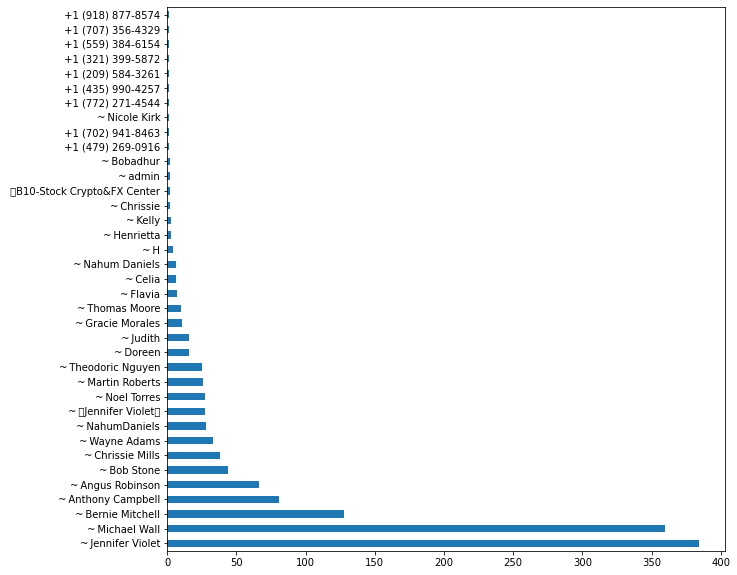

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

message_df['sender'].value_counts().plot(ax=ax, kind='barh',figsize=(10,10))


In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("svalabs/twitter-xlm-roberta-crypto-spam")

model = AutoModelForSequenceClassification.from_pretrained("svalabs/twitter-xlm-roberta-crypto-spam")

In [16]:
from transformers import TextClassificationPipeline

model = AutoModelForSequenceClassification.from_pretrained("svalabs/twitter-xlm-roberta-crypto-spam")
tokenizer = AutoTokenizer.from_pretrained("svalabs/twitter-xlm-roberta-crypto-spam")
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
# outputs a list of dicts like [[{'label': 'NEGATIVE', 'score': 0.0001223755971295759},  {'label': 'POSITIVE', 'score': 0.9998776316642761}]]
value=pipe("I love this movie!")

/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/transformers/pipelines/text_classification.py:89: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [17]:
value[0][1]['score']

0.9536888599395752

In [18]:
message_df['spam_score']=''

In [19]:
for index in range(0,len(message_df['message'])):
    value=pipe(message_df['message'][index])
    message_df['spam_score'][index]=value[0][1]['score']
    #print()

In [20]:
message_df['sender'].unique()

array([' 🏆B10-Stock Crypto&FX Center', ' ~\u202fH', ' ~\u202fadmin',
       ' ~\u202f\u2068Jennifer Violet\u2069', ' ~\u202fBernie Mitchell',
       ' ~\u202fChrissie', ' ~\u202fAnthony Campbell',
       ' ~\u202fNoel Torres', ' ~\u202fNahum Daniels',
       ' ~\u202fAngus Robinson', ' ~\u202fJennifer Violet',
       ' ~\u202fMartin Roberts', ' ~\u202fCelia', ' ~\u202fWayne Adams',
       ' ~\u202fTheodoric Nguyen', ' ~\u202fDoreen',
       ' ~\u202fGracie Morales', ' ~\u202fMichael Wall',
       ' ~\u202fBob Stone', ' ~\u202fBobadhur', ' ~\u202fJudith',
       ' ~\u202fHenrietta', ' \u202a+1\xa0(435)\xa0990‑4257\u202c',
       ' \u202a+1\xa0(918)\xa0877‑8574\u202c',
       ' \u202a+1\xa0(772)\xa0271‑4544\u202c', ' ~\u202fNahumDaniels',
       ' ~\u202fChrissie Mills', ' ~\u202fKelly', ' ~\u202fThomas Moore',
       ' \u202a+1\xa0(209)\xa0584‑3261\u202c',
       ' \u202a+1\xa0(479)\xa0269‑0916\u202c',
       ' \u202a+1\xa0(702)\xa0941‑8463\u202c',
       ' \u202a+1\xa0(559)\xa0384‑6154

In [21]:
spamscore = message_df.groupby('sender')['spam_score'].sum().reset_index().sort_values('spam_score', ascending=False)

In [22]:
spamscore.head()

,sender,spam_score
13,~ Jennifer Violet,302.651329
17,~ Michael Wall,182.389717
2,~ Bernie Mitchell,74.834959
1,~ Anthony Campbell,51.150043
0,~ Angus Robinson,40.754201


/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8296 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8296 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/nak3t/.conda/envs/BERTPython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8297 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/nak3t/.conda/envs/BERTPyth

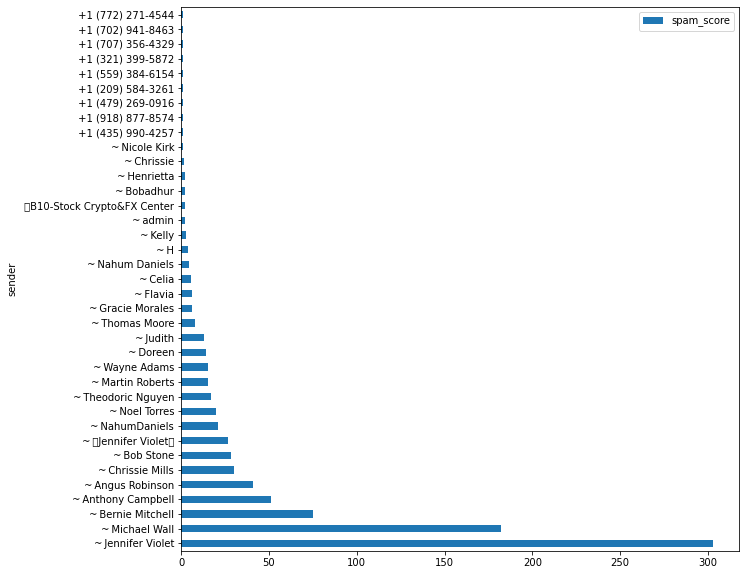

In [23]:

spamscore.plot(x='sender',y='spam_score',kind = 'barh',figsize=(10,10))

plt.show() 

In [69]:
#Sentiment Analysis

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]